
--- Random Forest ---
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



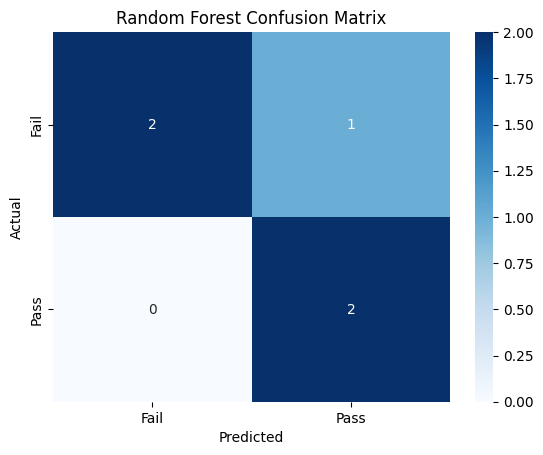


--- AdaBoost ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



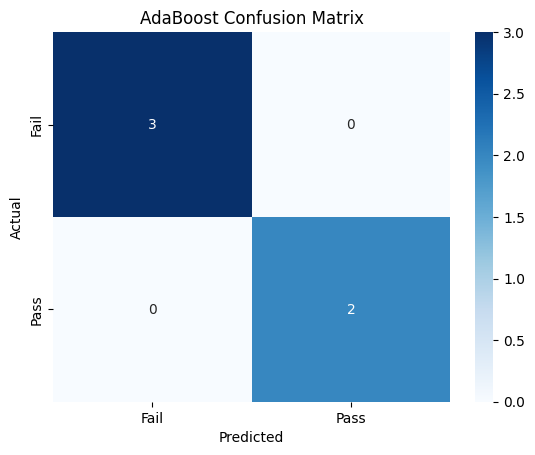


--- Gradient Boosting ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



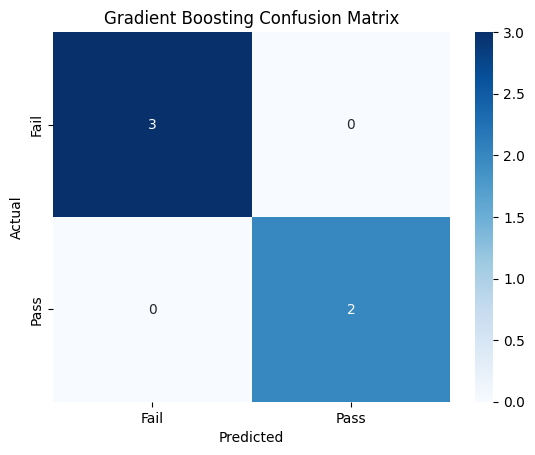

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


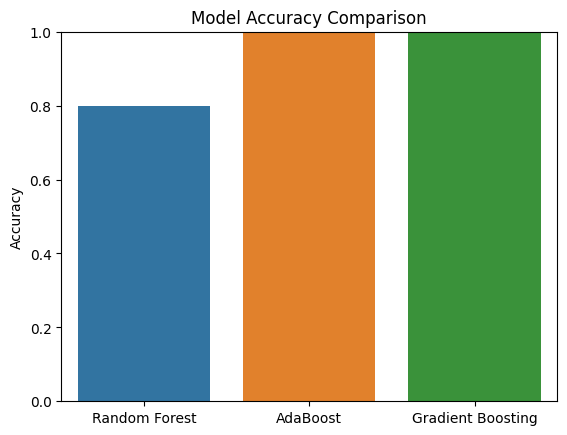

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Extended dataset with 20 samples (balanced)
data = {
    'Class_Disruptions': [2, 7, 1, 5, 3, 6, 0, 8, 4, 9, 1, 3, 2, 5, 6, 4, 2, 7, 5, 1],
    'Homework_Completion': [95, 50, 100, 60, 80, 55, 98, 45, 75, 40, 90, 65, 85, 70, 58, 93, 99, 52, 68, 88],
    'Parental_Involvement': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
                             'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Detention_Count': [0, 3, 0, 2, 1, 3, 0, 4, 1, 5, 0, 2, 1, 3, 2, 0, 1, 4, 2, 3],
    'Pass_Fail': ['Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail',
                  'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail']
}

df = pd.DataFrame(data)

# Encode categorical features
le = LabelEncoder()
df['Parental_Involvement'] = le.fit_transform(df['Parental_Involvement'])  # Yes = 1, No = 0
df['Pass_Fail'] = le.fit_transform(df['Pass_Fail'])  # Pass = 1, Fail = 0

# Split features and target
X = df.drop('Pass_Fail', axis=1)
y = df['Pass_Fail']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Initialize classifiers
rf = RandomForestClassifier(random_state=42)
ab = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Train models
rf.fit(X_train, y_train)
ab.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_ab = ab.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Evaluation function
def evaluate(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate each model
evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_ab, "AdaBoost")
evaluate(y_test, y_pred_gb, "Gradient Boosting")

# Compare model accuracy
accuracies = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "AdaBoost": accuracy_score(y_test, y_pred_ab),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb)
}

sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
